In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# for train-test split
from sklearn.model_selection import train_test_split

# for K fold validation
from sklearn.model_selection import GridSearchCV

# for decision tree 
from sklearn.tree import DecisionTreeClassifier

# To visulaize the tree we need below package
from IPython.display import Image # from a given structure draw an image if that supports
from six import StringIO # to output a graph into a file
from sklearn.tree import export_graphviz # from a decision tree plot a graph
import pydotplus, graphviz

# for evaluating the model
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv('heart_v2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
df.head(5)

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [5]:
df.describe()

age         sex          BP  cholestrol  heart disease
count  270.000000  270.000000  270.000000  270.000000     270.000000
mean    54.433333    0.677778  131.344444  249.659259       0.444444
std      9.109067    0.468195   17.861608   51.686237       0.497827
min     29.000000    0.000000   94.000000  126.000000       0.000000
25%     48.000000    0.000000  120.000000  213.000000       0.000000
50%     55.000000    1.000000  130.000000  245.000000       0.000000
75%     61.000000    1.000000  140.000000  280.000000       1.000000
max     77.000000    1.000000  200.000000  564.000000       1.000000

In [6]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [7]:
X = df.drop('heart disease',axis=1)
y = df['heart disease']

## Notes

- Heart disease = 0 means that the person does not have heart disease.
- Heart disease = 1 means that the person has heart disease.
 
- sex = 0 means that the person is female.
- sex = 1 means that the person is male.


### In this dataset no cleaning, imbalace techniques, data preparation or feature manipulation techniques are needed.

### Train - test split 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape


((189, 4), (81, 4))

## Building the decision tree model

- Using all default parameters except depth(max_depth) to build a simple tree. We will check this part later.

In [9]:
# Object of DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)

In [10]:
# Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

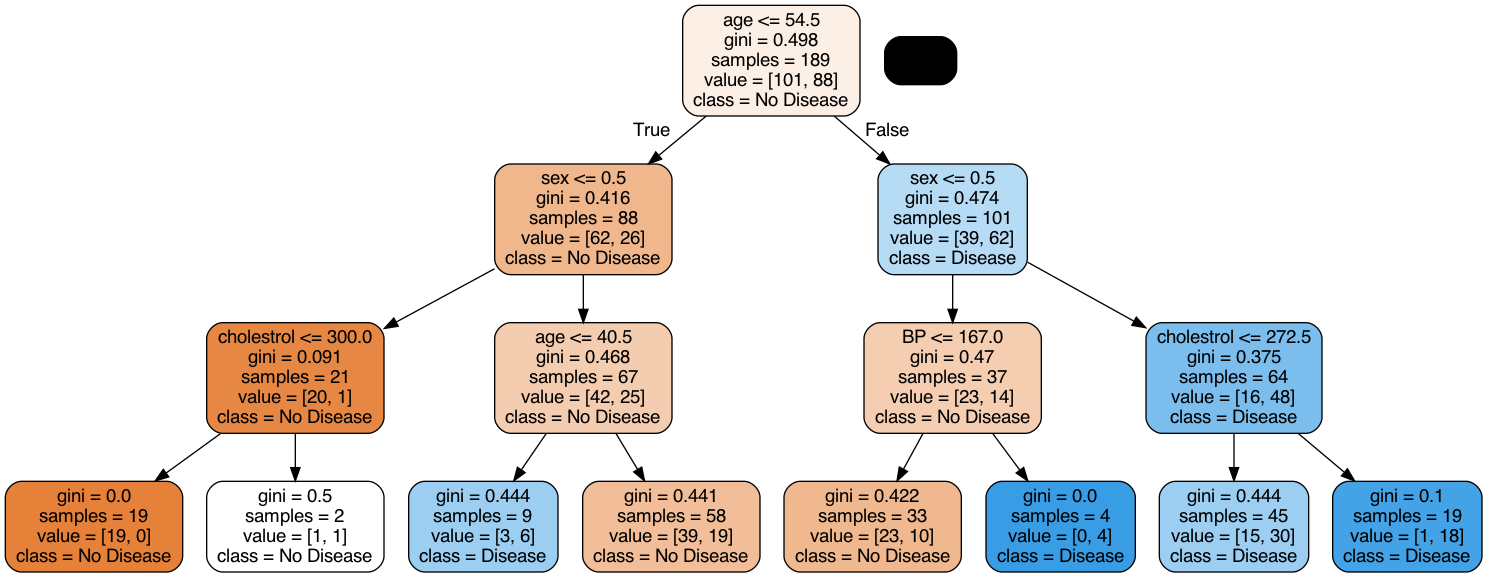

In [11]:
# plotting tree with max_depth=3
dot_data = StringIO()  

# with below step create a graphvoz object and put in dot_data
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

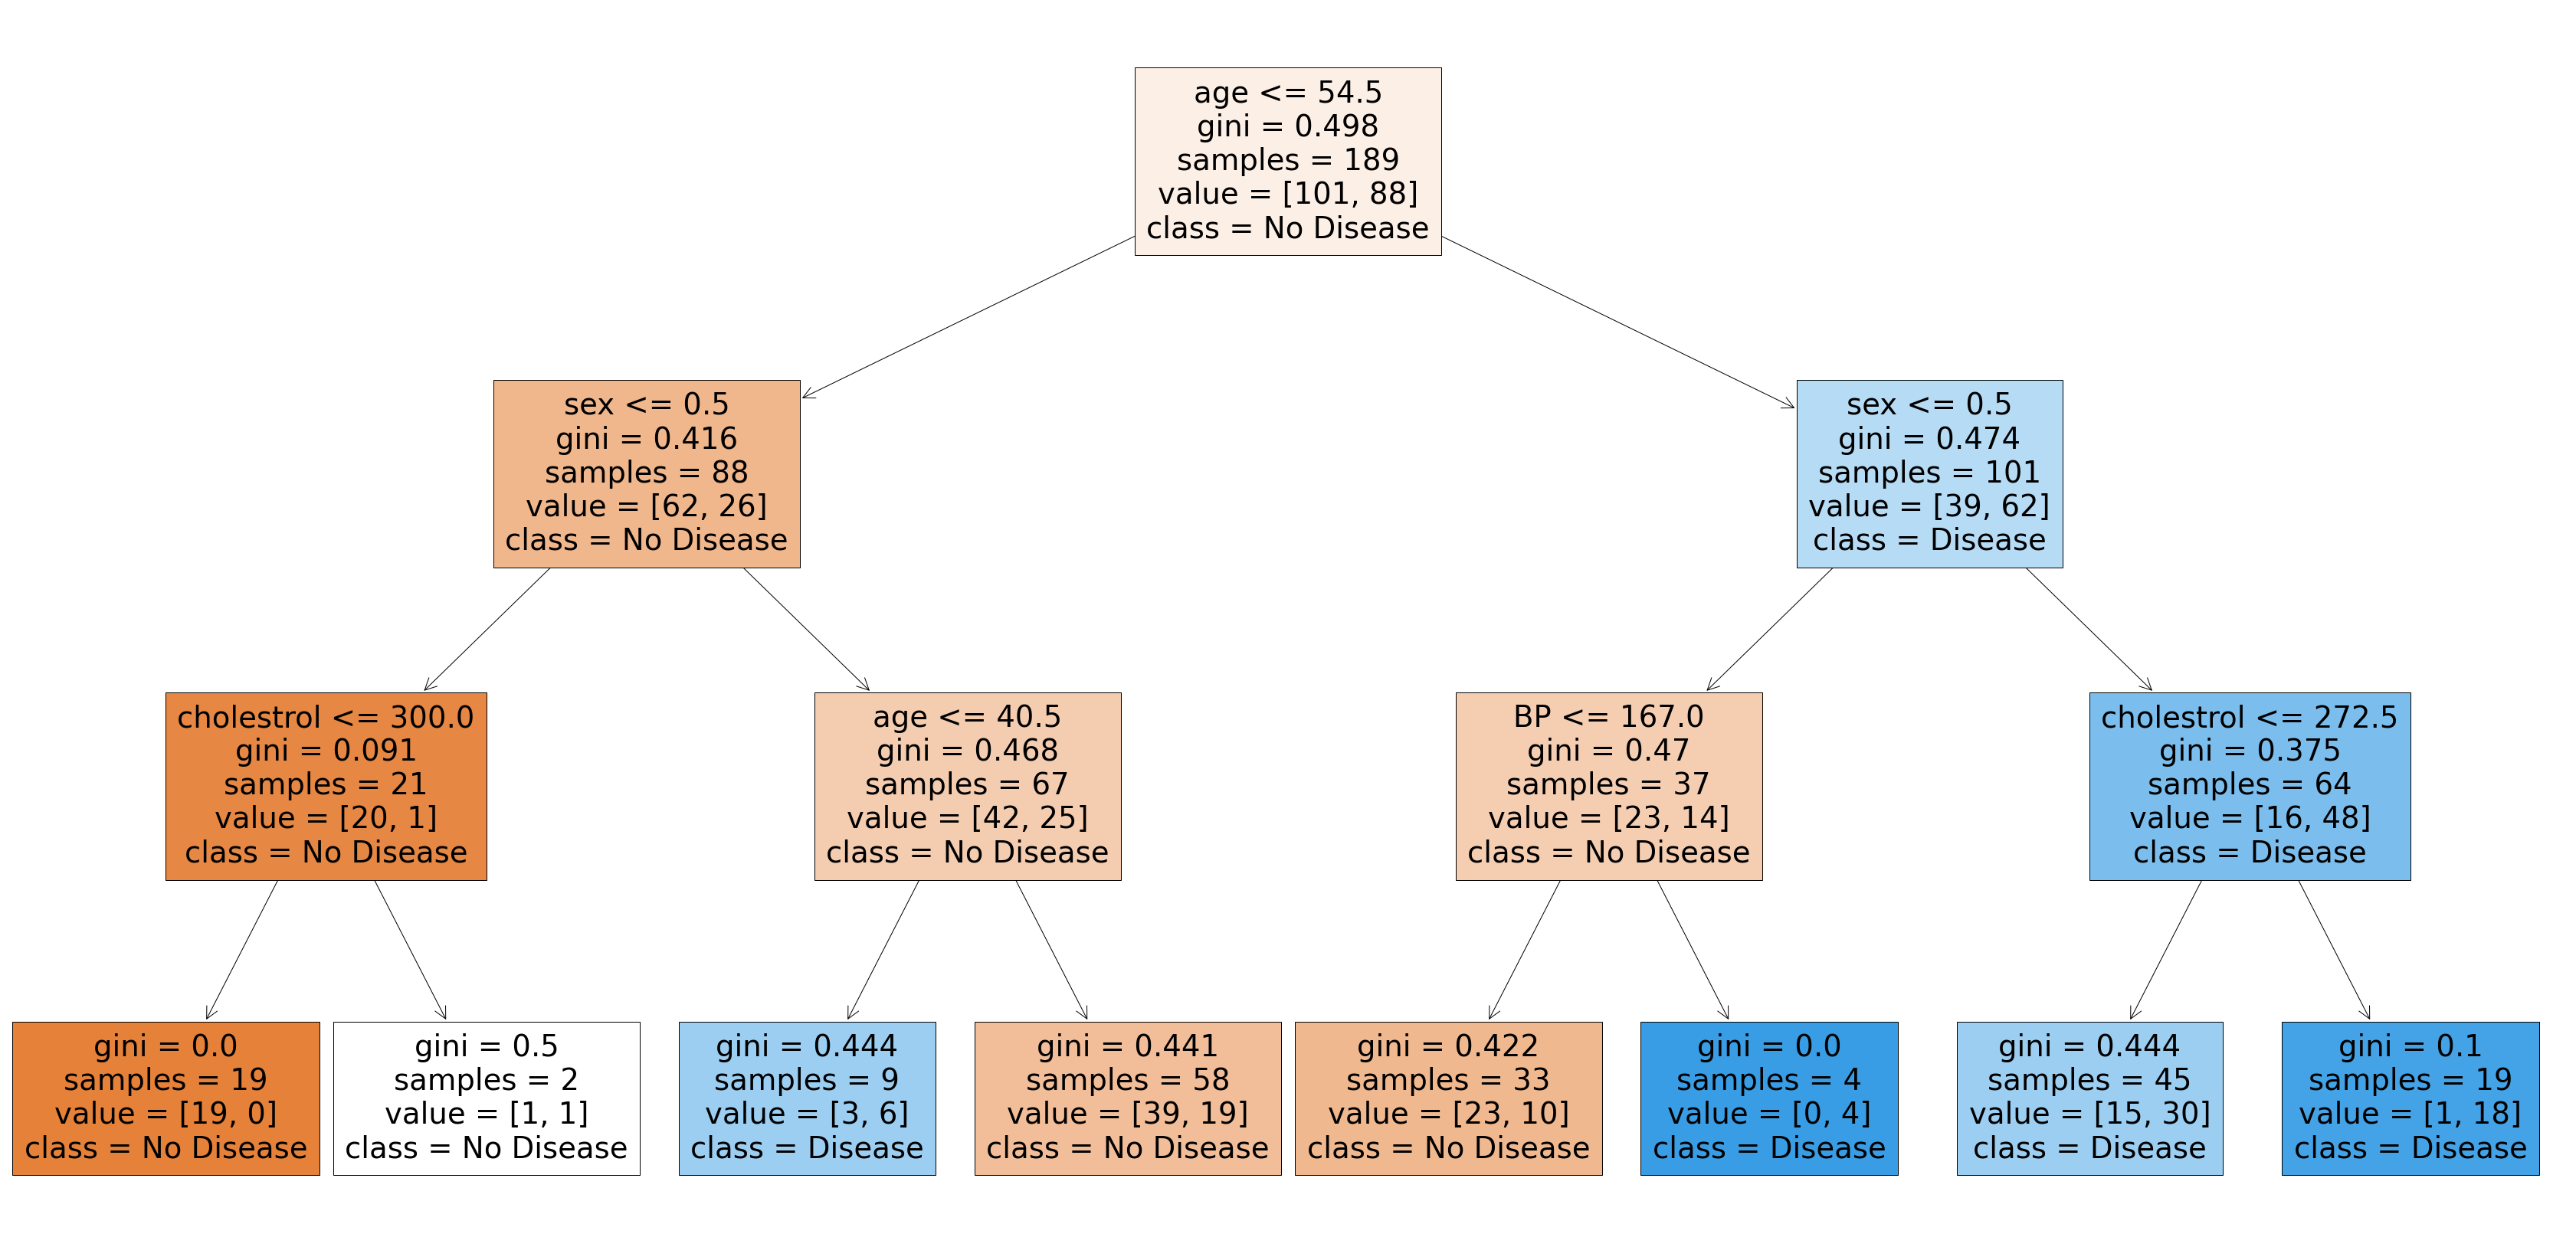

In [12]:
### Alternate way to plot
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

## Evaluating the models performance on test set

In [13]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [14]:
# on training data
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [15]:
# on testing data
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

### There is a big drop in accuracy from train to test.

- To deal with this we will change few hyperparameters and see if we get better results.

### Creating helper functions to evaluate model performance and help plot the decision tree.

In [16]:
def get_dt_graph(dt_classifier):
    # plotting tree with max_depth=3
    dot_data = StringIO()  

    # with below step create a graphvoz object and put in dot_data
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [17]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [18]:
evaluate_model(dt)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


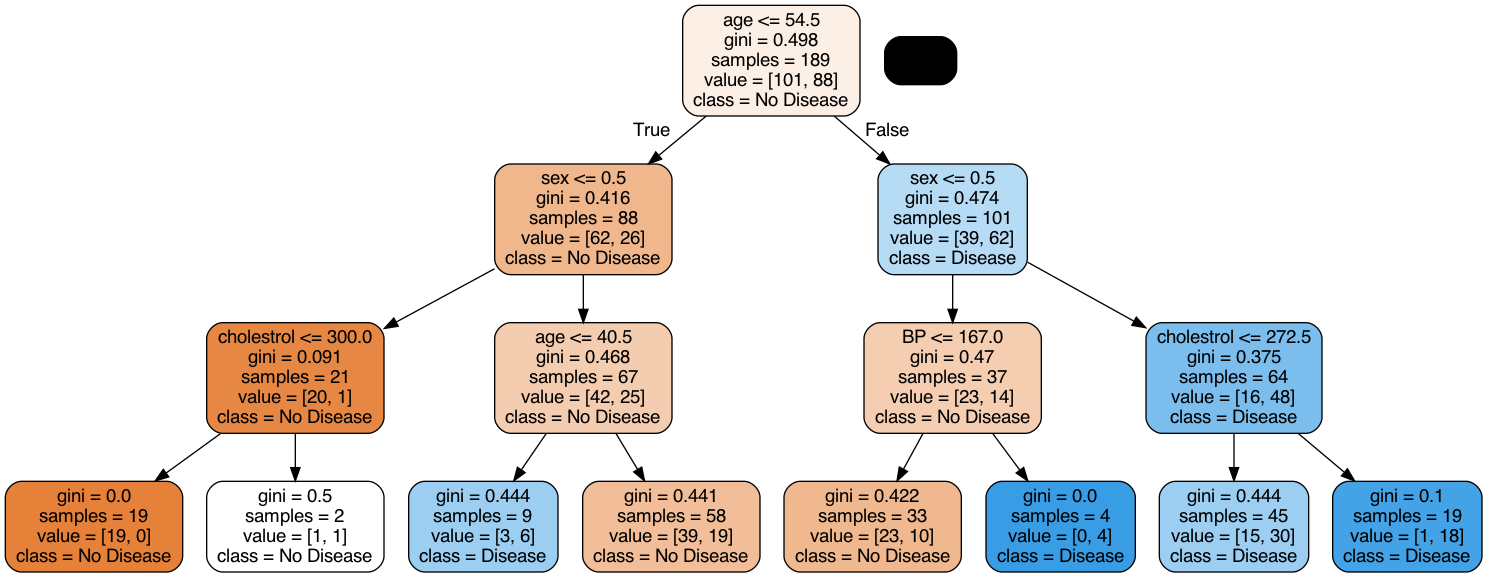

In [19]:
gph = get_dt_graph(dt)
Image(gph.create_png())

### Decision Tree without setting any hyper-parameter setting

In [20]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

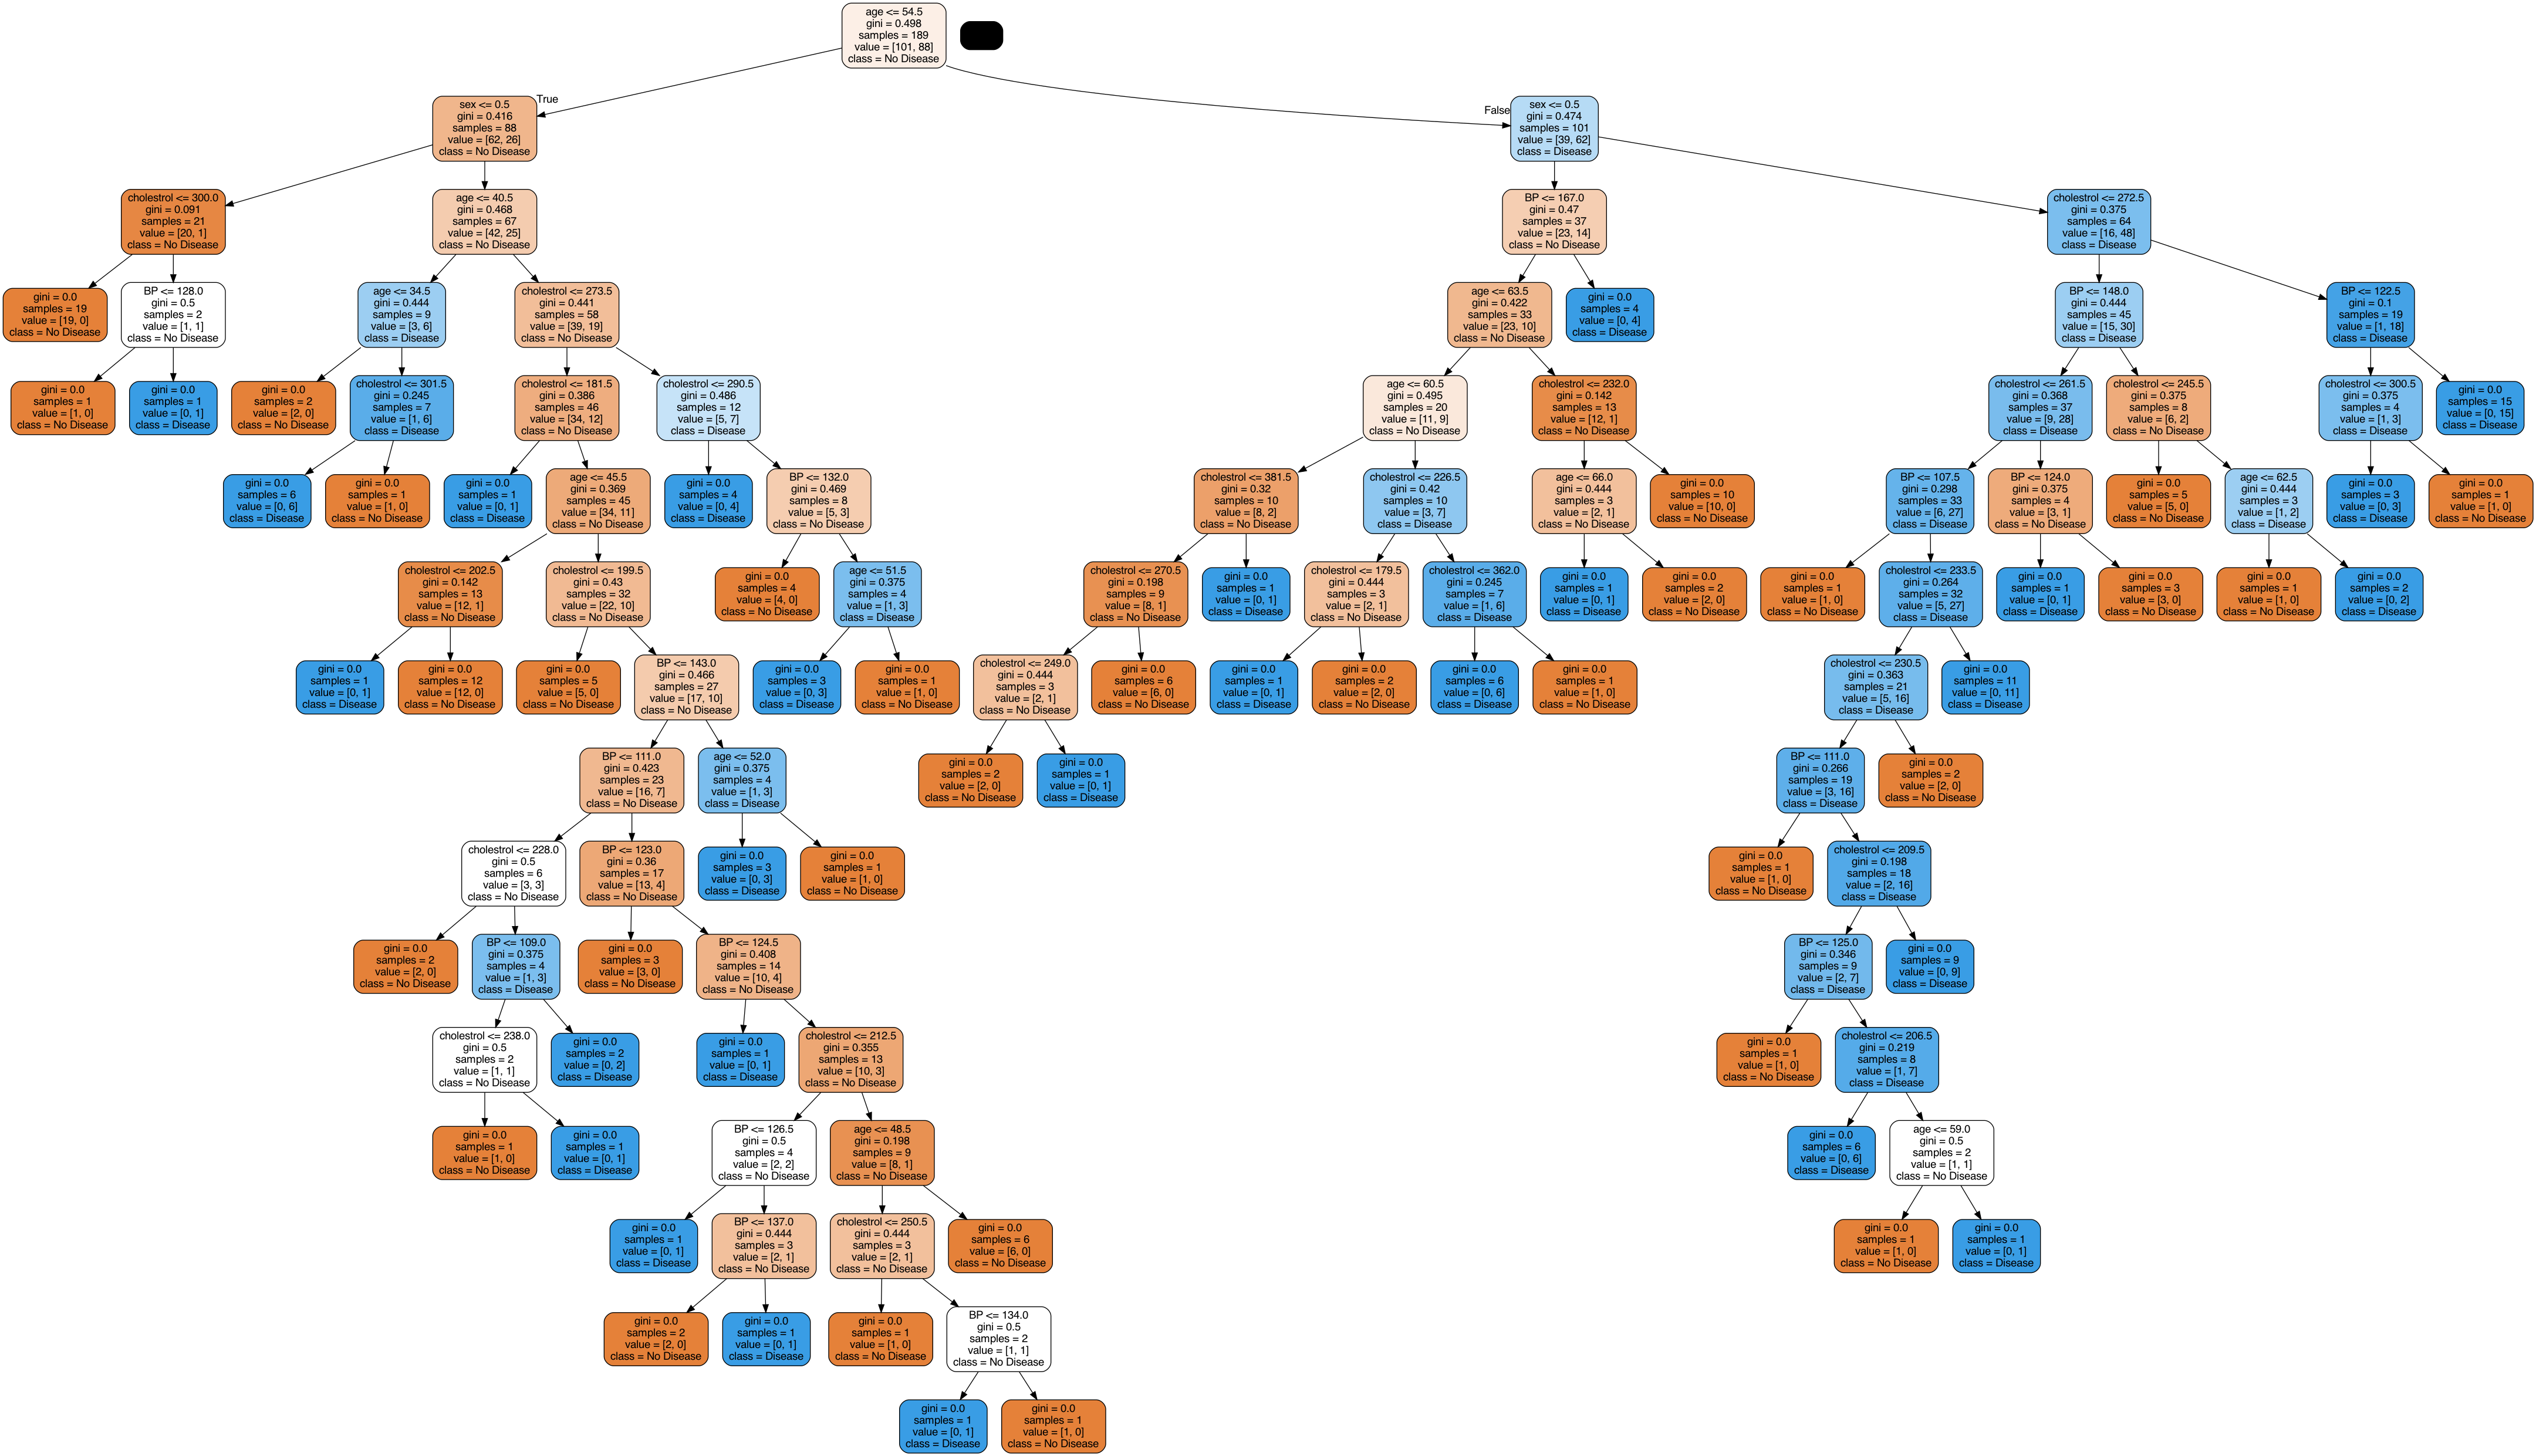

In [21]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

## Note: If we dont specify min_samples_leaf then by default it takes value as 1 as we can see in above praph.

### Lets evaluate this tree model with no hyper-parameter setting.

In [23]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


### This is an overfitting case.

### Controlling the depth of the tree

In [27]:
dt_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

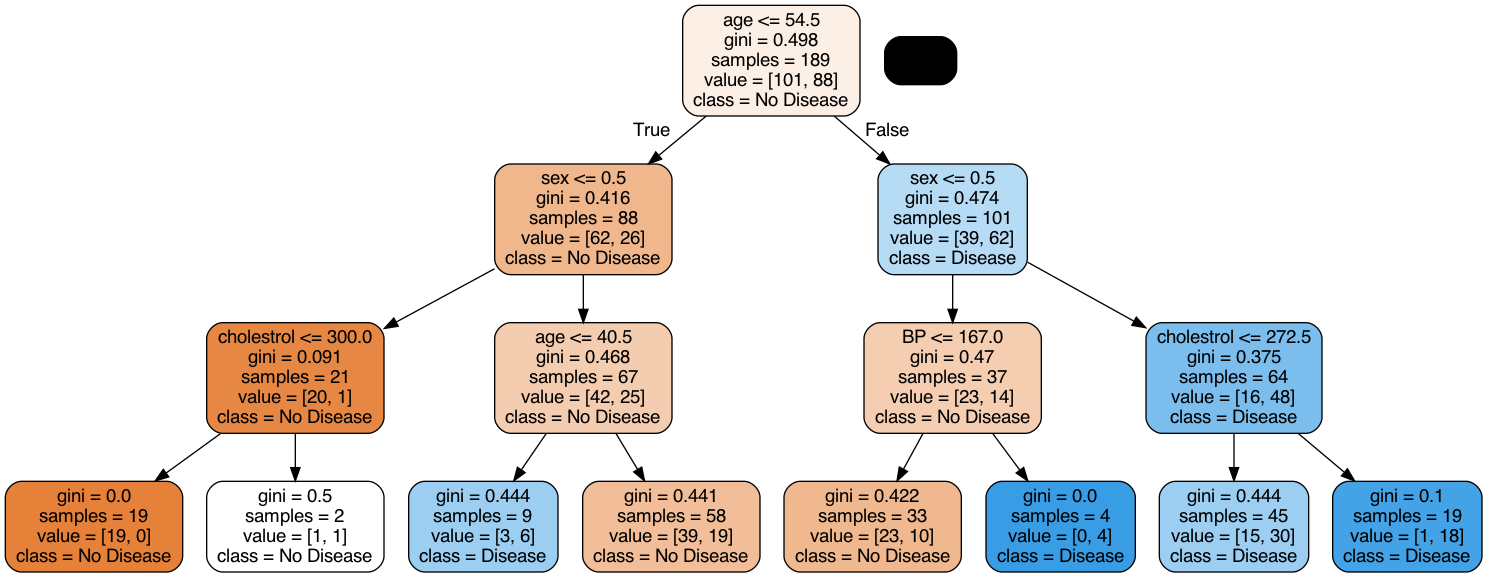

In [28]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [29]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples before split

In [33]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20, random_state=42)
# Here 20 means if a node is less than 20 then it will not split that node further.
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

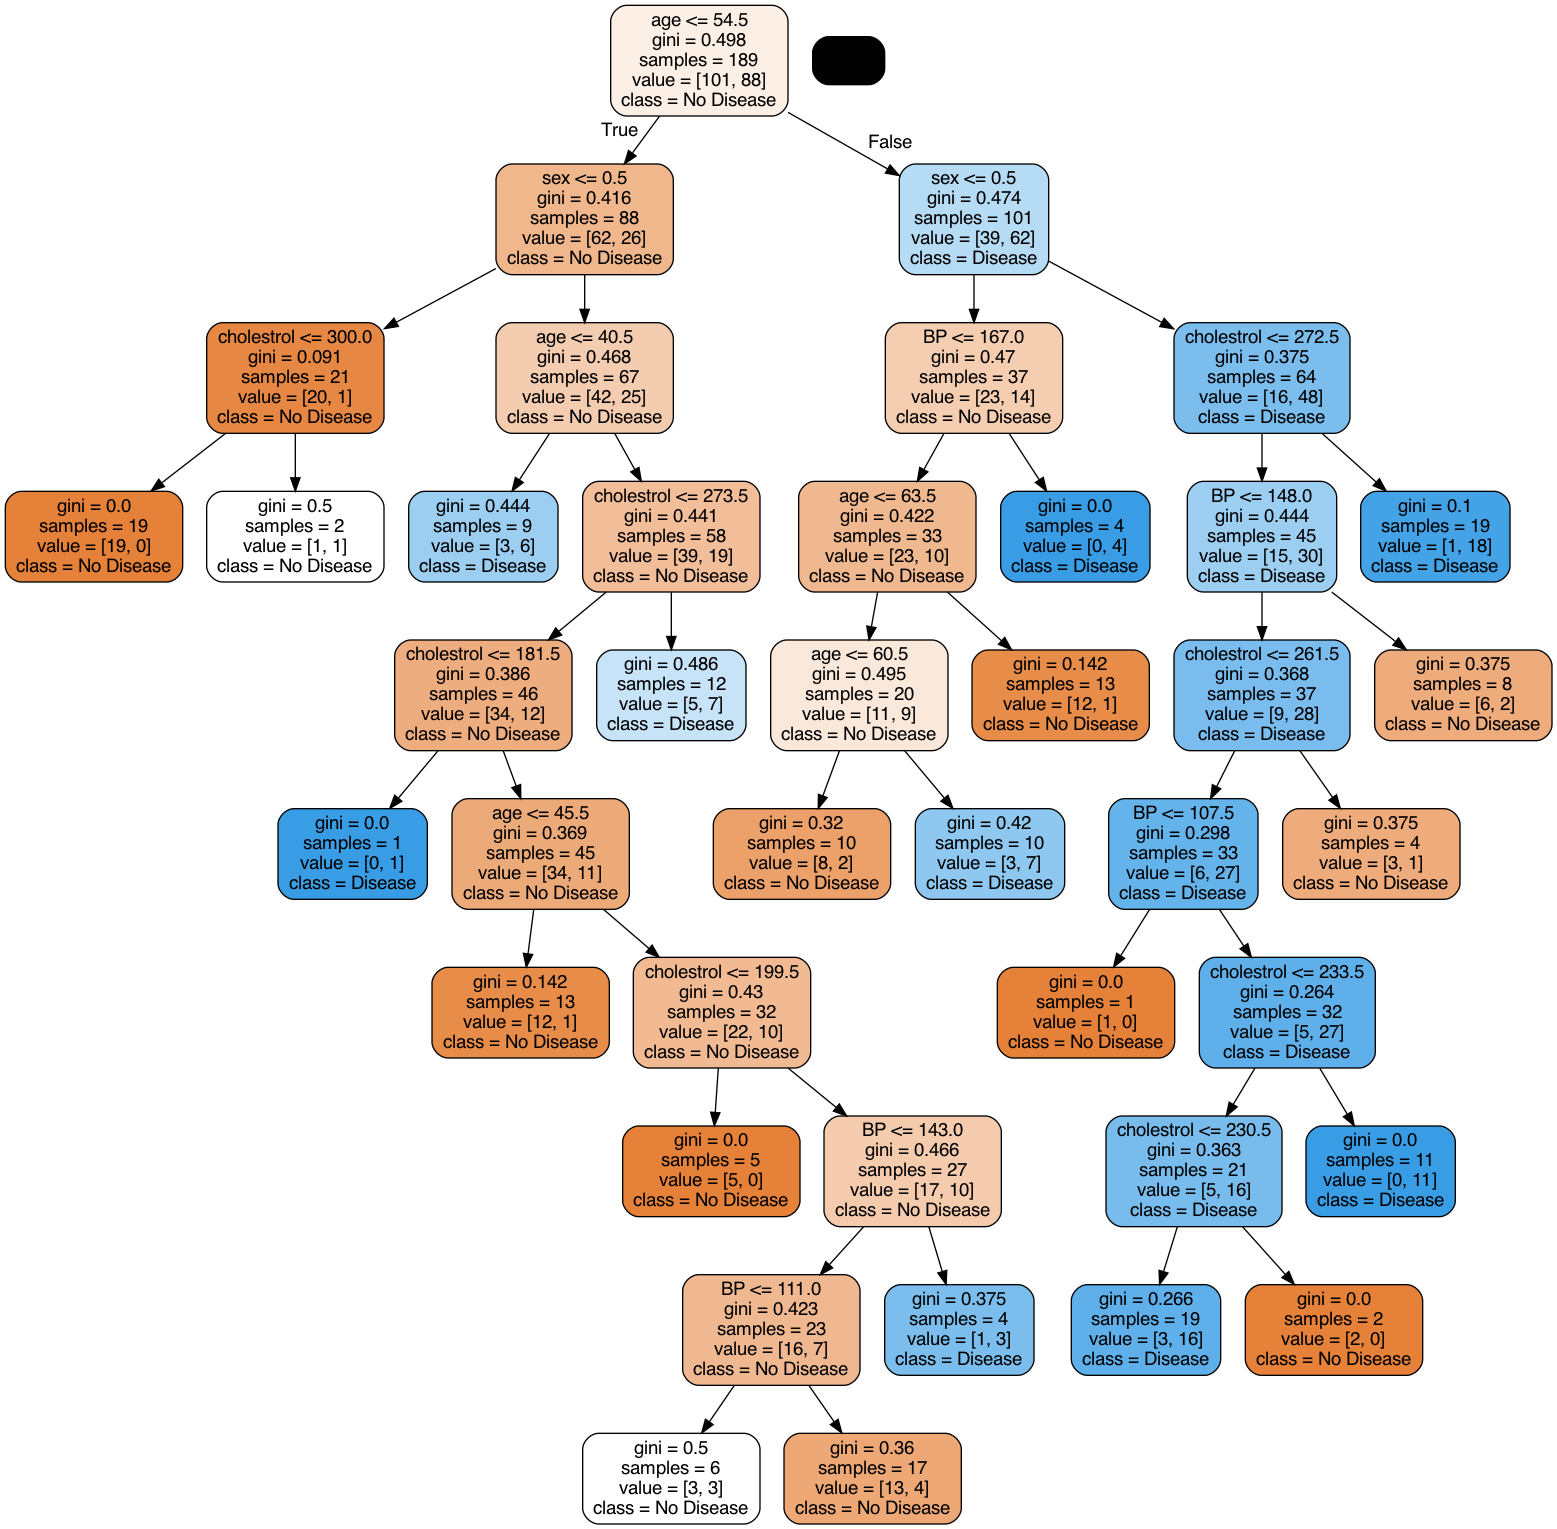

In [34]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [36]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [38]:
dt_min_leaft = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaft.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

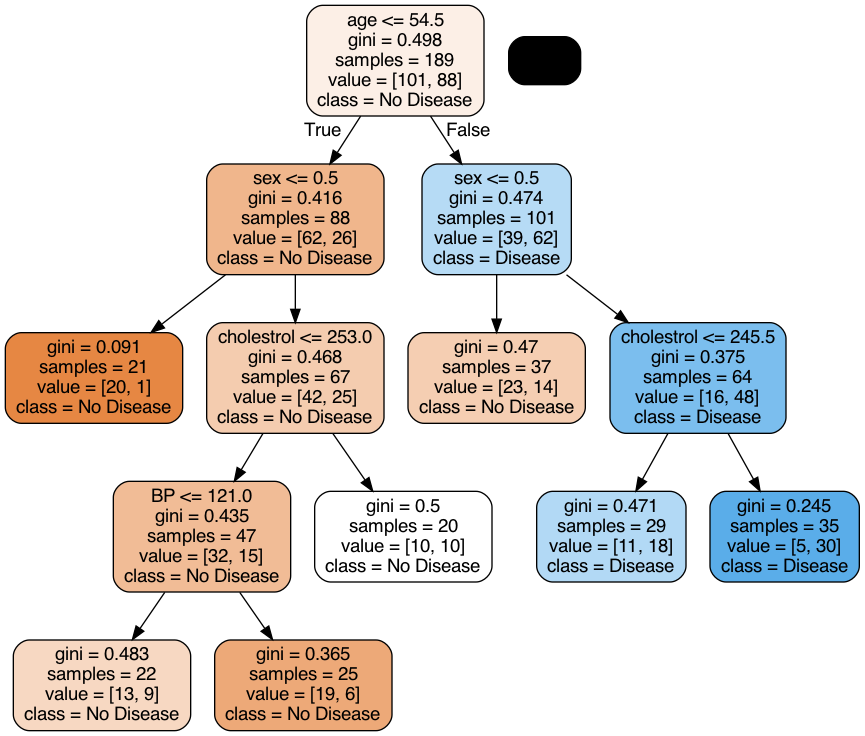

In [39]:
gph = get_dt_graph(dt_min_leaft)
Image(gph.create_png())

In [40]:
evaluate_model(dt_min_leaft)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


## Using Entropy instead of Gini

In [46]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
# defualt criterion is Gini
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

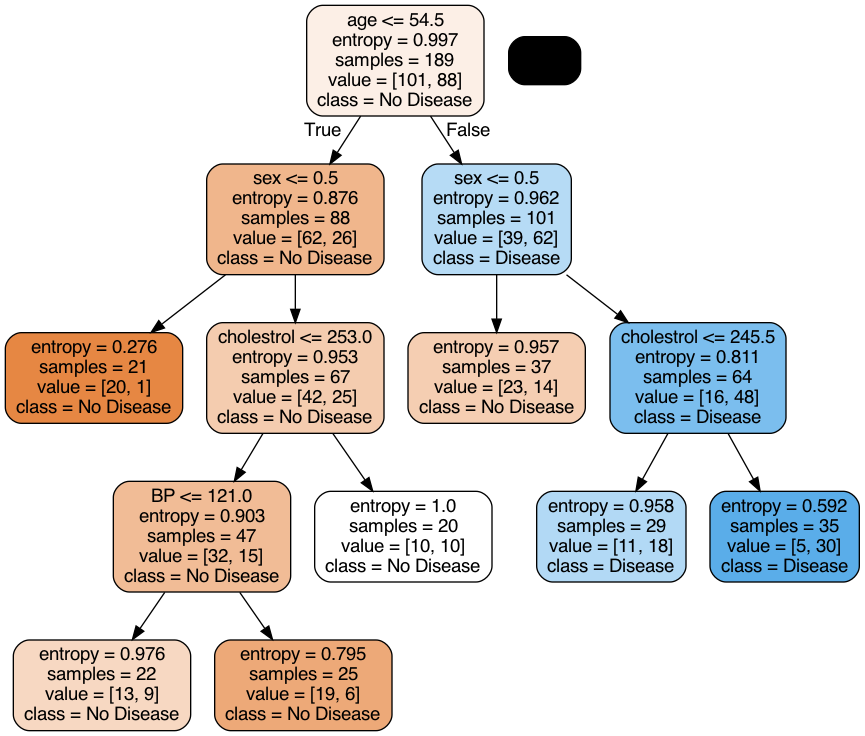

In [47]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [48]:
evaluate_model(dt_min_leaft_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Entropy and Gini index are numerically similar

### Hyper-parameter tuning Grid Search CV

In [49]:
dt = DecisionTreeClassifier(random_state=42)

In [54]:
# For Grid search to work we need to specify few parameters
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy']
}
# so total 5*5*2 = 50 candidates for model because each setting of hyperaramter is a model

In [55]:
# cv = 4 means use 75% data for training and 25% of data for validation
# for each iteration it will shuffle the data and another set of 75%:25% will be used.
# n_jobs: if we have multiple proocessor it will try to use that
# verbose = 1 wiill show the progress
# scoring = accuracy, will be used to evaluate the model
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")

In [56]:
%%time
# %%time is used to see the time of execution, it has to be the first line of the cell.
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 311 ms, sys: 137 ms, total: 447 ms
Wall time: 2.83 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [58]:
# grid_search.cv_results_ shows what all things it tried
grid_search.cv_results_ 

{'mean_fit_time': array([0.00495493, 0.0082255 , 0.00799888, 0.00930101, 0.00840223,
        0.00956333, 0.01141793, 0.01277155, 0.00600022, 0.00571847,
        0.00879866, 0.00615078, 0.00645638, 0.00494671, 0.00571591,
        0.0048492 , 0.00295556, 0.00298643, 0.00246209, 0.00257993,
        0.00294727, 0.00275451, 0.00255805, 0.00242591, 0.00269556,
        0.00279725, 0.0029785 , 0.00309056, 0.00285882, 0.002424  ,
        0.00275826, 0.00276595, 0.00317079, 0.00323778, 0.00301474,
        0.00363034, 0.0031867 , 0.00327802, 0.00349426, 0.00312269,
        0.00321555, 0.00298643, 0.00362861, 0.00269574, 0.00250876,
        0.00253808, 0.00227326, 0.00200778, 0.00214875, 0.00198805]),
 'std_fit_time': array([1.63267687e-04, 3.51402772e-03, 9.01721120e-04, 1.86179044e-03,
        2.39036318e-03, 2.09816589e-03, 1.03689535e-02, 7.48896125e-03,
        1.15439899e-03, 1.62747560e-03, 2.83391516e-03, 1.20610218e-03,
        1.04652245e-03, 2.25101043e-04, 1.35075976e-03, 5.48289984e-0

In [61]:
# as grid_search.cv_results_ is not readable, putting it df
cv_pd = pd.DataFrame(grid_search.cv_results_)
cv_pd.head()
# Here each row represents a combination that was tried

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004955      0.000163         0.002735        0.000343   
1       0.008226      0.003514         0.007770        0.006718   
2       0.007999      0.000902         0.009601        0.006076   
3       0.009301      0.001862         0.005677        0.002138   
4       0.008402      0.002390         0.004421        0.000914   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.541667   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.744681           0.617021           0.531915         0.650488   
1           0.744681           0.617021           0.531915         0.650488   
2           0.744681           0.617021           0.531915         0.645279   
3           0.680851           0.574468           0.702128         0.656028   
4           0.531915           0.531915           0.531915         0.534353   

   std_test_score  rank_test_score  
0        0.082762               17  
1        0.082762               17  
2        0.079551               20  
3        0.048751                3  
4        0.004223               41

In [62]:
cv_pd.shape

(50, 15)

In [63]:
# To see 5 best combinations
cv_pd.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30       0.002758      0.000613         0.001670        0.000313   
5        0.009563      0.002098         0.003481        0.000434   
3        0.009301      0.001862         0.005677        0.002138   
8        0.006000      0.001154         0.004202        0.001814   
13       0.004947      0.000225         0.002882        0.000107   

   param_criterion param_max_depth param_min_samples_leaf  \
30         entropy               3                      5   
5             gini               3                      5   
3             gini               2                     50   
8             gini               3                     50   
13            gini               5                     50   

                                               params  split0_test_score  \
30  {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.604167   
5   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.625000   
3   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
8   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.666667   
13  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.666667   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
30           0.765957           0.617021           0.680851         0.666999   
5            0.744681           0.595745           0.659574         0.656250   
3            0.680851           0.574468           0.702128         0.656028   
8            0.680851           0.574468           0.702128         0.656028   
13           0.680851           0.574468           0.702128         0.656028   

    std_test_score  rank_test_score  
30        0.064090                1  
5         0.055831                2  
3         0.048751                3  
8         0.048751                3  
13        0.048751                3

In [64]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [65]:
grid_search.best_score_

0.6669991134751774

In [66]:
dt_best = grid_search.best_estimator_

In [67]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


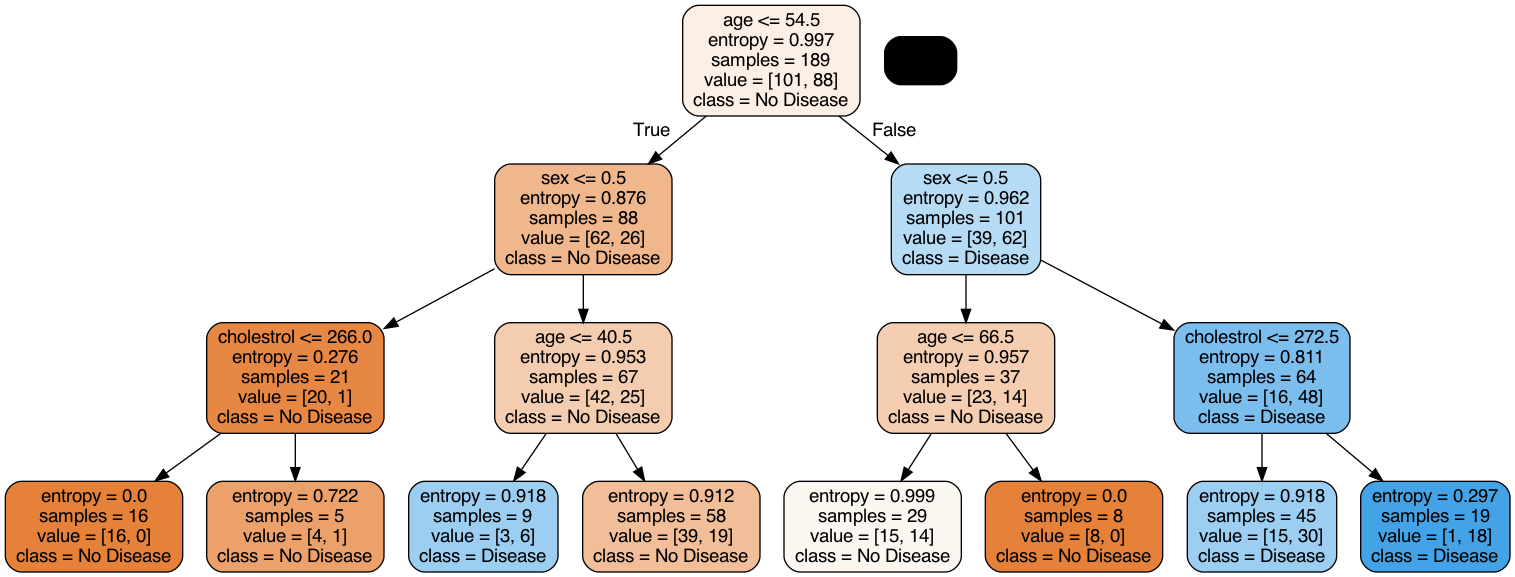

In [68]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

### We can further tune the results by tuning hyperparamaters differently